24
24


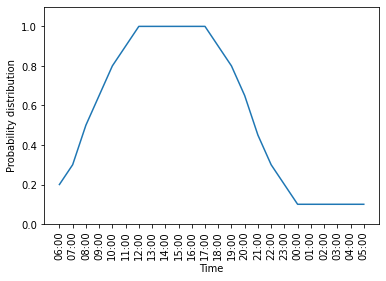

In [19]:
from model_lomba import *
import matplotlib.pyplot as plt
import seaborn as sns

demand = [0.2,0.3,0.5,0.65,0.8,0.9,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.8,0.65,0.45,0.3,0.2,0.1,0.1,0.1,0.1,0.1,0.1]
hour = ["06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00","00:00","01:00","02:00","03:00","04:00","05:00"]
print(len(demand))
print(len(hour))

plt.plot(hour,demand)
plt.xticks(rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('Probability distribution')
plt.title('')
plt.ylim([0.0,1.1])
#plt.tight_layout()
#plt.savefig('Prob-dist.png', format = 'png' )
plt.show()

In [20]:
map_width = 50
map_height = 50
moore = False
num_of_motorist = 50

#With inventory
inv_size = 18
cp_size = 6

#Without inventory
#cp_size = 10

model = switching_model(num_of_motorist=50,num_of_stations=16,inv_size=inv_size,cp_size= cp_size,width=map_width,height=map_height,moore=moore, configuration="random", demand = demand)

#Dalam menit
days = 30
num_of_step = days*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

16


In [21]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position       Charge Alive  Full_battery  Empty_battery  \
Step AgentID                                                            
0    0           None   947.343446  None           NaN            NaN   
     1           None  1763.397039  None           NaN            NaN   
     2           None  1786.949640  None           NaN            NaN   
     3           None  2009.215551  None           NaN            NaN   
     4           None  2531.854330  None           NaN            NaN   

              CP_full  CP_empty  
Step AgentID                     
0    0            NaN       NaN  
     1            NaN       NaN  
     2            NaN       NaN  
     3            NaN       NaN  
     4            NaN       NaN

In [22]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
434    True
435    True
436    True
437    True
438    True
439    True
440    True
441    True
442    True
443    True
444    True
445    True
446    True
447    True
448    True
449    True
450    True
451    True
452    True
453    True
454    True
455    True
456    True
457    True
458    True
459    True
460    True
461    True
462    True
463    True
464    True
465    True
466    True
467    True
468    True
469    True
470    True
471    True
472    True
473    True
474    True
475    True
476    True
477    True
478    True
479    True
480    True
481    True
482    True
483    True
Name: Alive, dtype: object

In [23]:
agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
484     (39, 6)
485     (3, 14)
486     (20, 6)
487    (14, 21)
488     (8, 25)
489    (32, 41)
490     (5, 11)
491    (29, 40)
492    (11, 36)
493    (47, 12)
494     (48, 7)
495    (20, 19)
496     (12, 9)
497     (9, 12)
498    (21, 48)
499    (15, 39)
Name: Position, dtype: object


In [24]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
484    18.0
485    18.0
486    18.0
487    18.0
488    18.0
489    18.0
490    18.0
491    18.0
492    18.0
493    18.0
494    18.0
495    18.0
496    18.0
497    18.0
498    18.0
499    18.0
Name: Full_battery, dtype: float64


In [25]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: Empty_battery, dtype: float64


In [26]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
484    6.0
485    6.0
486    6.0
487    6.0
488    6.0
489    6.0
490    6.0
491    6.0
492    6.0
493    5.0
494    5.0
495    6.0
496    6.0
497    6.0
498    6.0
499    6.0
Name: CP_full, dtype: float64


In [27]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    1.0
494    1.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: CP_empty, dtype: float64


In [28]:
#Ambil data motorist
driver_num = 2
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
43195    (13, 7)
43196    (13, 7)
43197    (14, 7)
43198    (14, 7)
43199    (14, 7)
Name: Position, dtype: object

Text(0, 0.5, 'y')

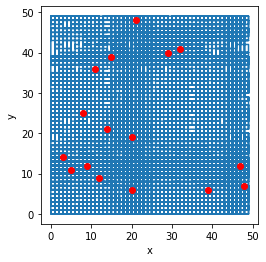

In [29]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
#plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

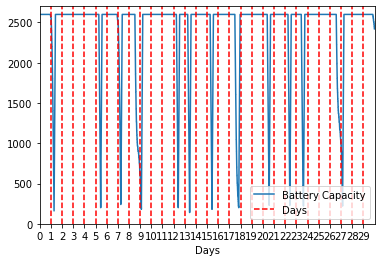

In [30]:
#Cek baterai
battery_id = model.motorists[2].batteries.unique_id
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Example of Battery Charge Cycle')
plt.show()

In [31]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive,num_of_charging
43195,50,2
43196,50,2
43197,50,2
43198,50,2
43199,50,2


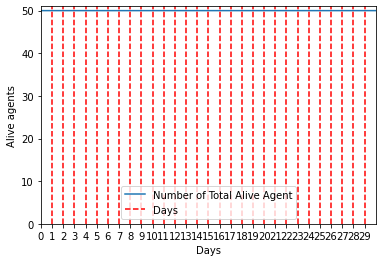

In [32]:
plt.plot(model_data["num_of_alive"])
plt.ylim([0,num_of_motorist + 1])
plt.ylabel("Alive agents")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number of Total Alive Agent','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

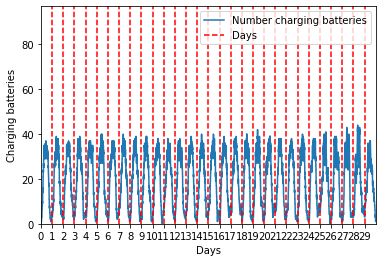

In [33]:
plt.plot(model_data["num_of_charging"])
plt.ylim([0,model.num_of_stations*model.cp_size +1])
plt.ylabel("Charging batteries")
plt.xlabel("Steps")
plt.xlim(0,num_of_step)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Number charging batteries','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
#plt.title('Number of Total Alive Agent')
plt.show()

In [34]:
#dapetin semua motor
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]
motorist_alive_position.tail()

#print jumlah baris
print(len(motorist_alive_position.index))

2160000


In [35]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

2160000


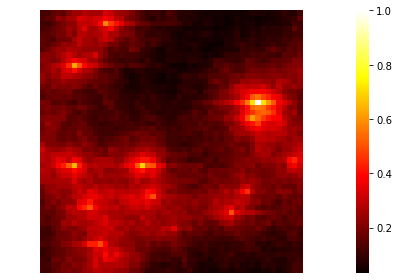

In [36]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data,cmap="hot")
ax.invert_yaxis()
plt.axis('equal')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.tick_params(left = False, bottom = False)
plt.tight_layout()
plt.savefig('heatmap random 16a 30 days.png', format = 'png' )
plt.show()